In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 3-1 non-linear regression

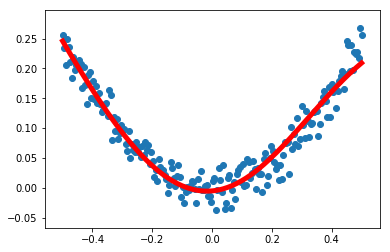

In [2]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

#define two placeholder
x = tf.placeholder(tf.float32,[None, 1])
y = tf.placeholder(tf.float32,[None, 1])

#define nn
Weight_L1 = tf.Variable(tf.random_normal([1,10]))
Biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + Biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#define output layer
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
Biases_L2 = tf.Variable(tf.random_normal([1,1]))
Wx_plux_b_L2 = tf.matmul(L1, Weight_L2) + Biases_L2
prediction = tf.nn.tanh(Wx_plux_b_L2)

#define loss and opt
loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #init varible
    sess.run(tf.global_variables_initializer())
    for _ in range(2001):
        sess.run(train_step, feed_dict={x:x_data,y:y_data})
        
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    #plot
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

# 3-2 Minst data classifer

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

batch_size = 80
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)

#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs,y:batch_ys})
        acc =sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print('Iter' + str(epoch) + ": Testing Accuracy " + str(acc))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0: Testing Accuracy 0.8293
Iter1: Testing Accuracy 0.8972
Iter2: Testing Accuracy 0.9059
Iter3: Testing Accuracy 0.9073
Iter4: Testing Accuracy 0.9101
Iter5: Testing Accuracy 0.912
Iter6: Testing Accuracy 0.9142
Iter7: Testing Accuracy 0.9167
Iter8: Testing Accuracy 0.9174
Iter9: Testing Accuracy 0.918
Iter10: Testing Accuracy 0.9186
Iter11: Testing Accuracy 0.9203
Iter12: Testing Accuracy 0.9204
Iter13: Testing Accuracy 0.9193
Iter14: Testing Accuracy 0.9215
Iter15: Testing Accuracy 0.9203
Iter16: Testing Accuracy 0.9224
Iter17: Testing Accuracy 0.9226
Iter18: Testing Accuracy 0.9223
Iter19: Testing Accuracy 0.9238
Iter20: Testing Accuracy 0.9217


In [44]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])
W_1 = tf.Variable(tf.zeros([784, 500]))
b_1 = tf.Variable(tf.zeros([500]))
prediction_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1)

W_2 = tf.Variable(tf.zeros([500,10]))
b_2 = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(prediction_1, W_2) + b_2)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(50):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs,y:batch_ys})
        acc =sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print('Iter' + str(epoch) + ": Testing Accuracy " + str(acc))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0: Testing Accuracy 0.101
Iter1: Testing Accuracy 0.1135
Iter2: Testing Accuracy 0.1135
Iter3: Testing Accuracy 0.1135
Iter4: Testing Accuracy 0.1135
Iter5: Testing Accuracy 0.1391
Iter6: Testing Accuracy 0.1889
Iter7: Testing Accuracy 0.2136
Iter8: Testing Accuracy 0.2273
Iter9: Testing Accuracy 0.2394
Iter10: Testing Accuracy 0.2728
Iter11: Testing Accuracy 0.3258
Iter12: Testing Accuracy 0.3535
Iter13: Testing Accuracy 0.3828
Iter14: Testing Accuracy 0.3811
Iter15: Testing Accuracy 0.3835
Iter16: Testing Accuracy 0.4101
Iter17: Testing Accuracy 0.4036
Iter18: Testing Accuracy 0.4176
Iter19: Testing Accuracy 0.4389
Iter20: Testing Accuracy 0.4471
Iter21: Testing Accuracy 0.4641
Iter22: Testing Accuracy 0.4807
Iter23: Testing Accuracy 0.4986
Iter24: Testing Accuracy 0.5039
Iter25: Testing A

In [29]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)